In [89]:
# Assignment 3

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_pinball_loss

In [46]:
# Loading the dataset
df=pd.read_csv("C://Users//DELL//OneDrive//Desktop//IBM//Assignment3//Abalone.csv")

In [47]:
# Descriptive Statistics

In [48]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [49]:
df.shape

(4177, 9)

In [50]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    4177 non-null   object 
 1   Length                 4177 non-null   float64
 2   Diameter               4177 non-null   float64
 3   Height                 4177 non-null   float64
 4   Whole_weight           4177 non-null   float64
 5   Shucked_weight         4177 non-null   float64
 6   Viscera_weight         4177 non-null   float64
 7   Shell_weight           4177 non-null   float64
 8   Class_number_of_rings  4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [52]:
# Adding age column into the dataset
df=df.assign(Age=df.Class_number_of_rings+1.5)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [53]:
# Dropping the Class_number_of_rings Column
df1=df.drop(columns=['Class_number_of_rings'],axis=1)

In [54]:
df1


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [55]:
# Visualization


In [56]:
# Univariate Analysis

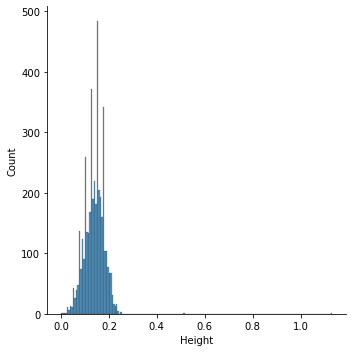

In [57]:
sns.displot(df1.Height)

In [58]:
#Bivariate analysis

D:\PYTHON\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Length'>

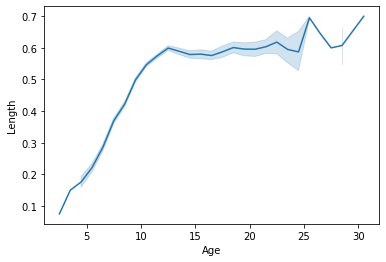

In [61]:
sns.lineplot(df1.Age,df1.Length)

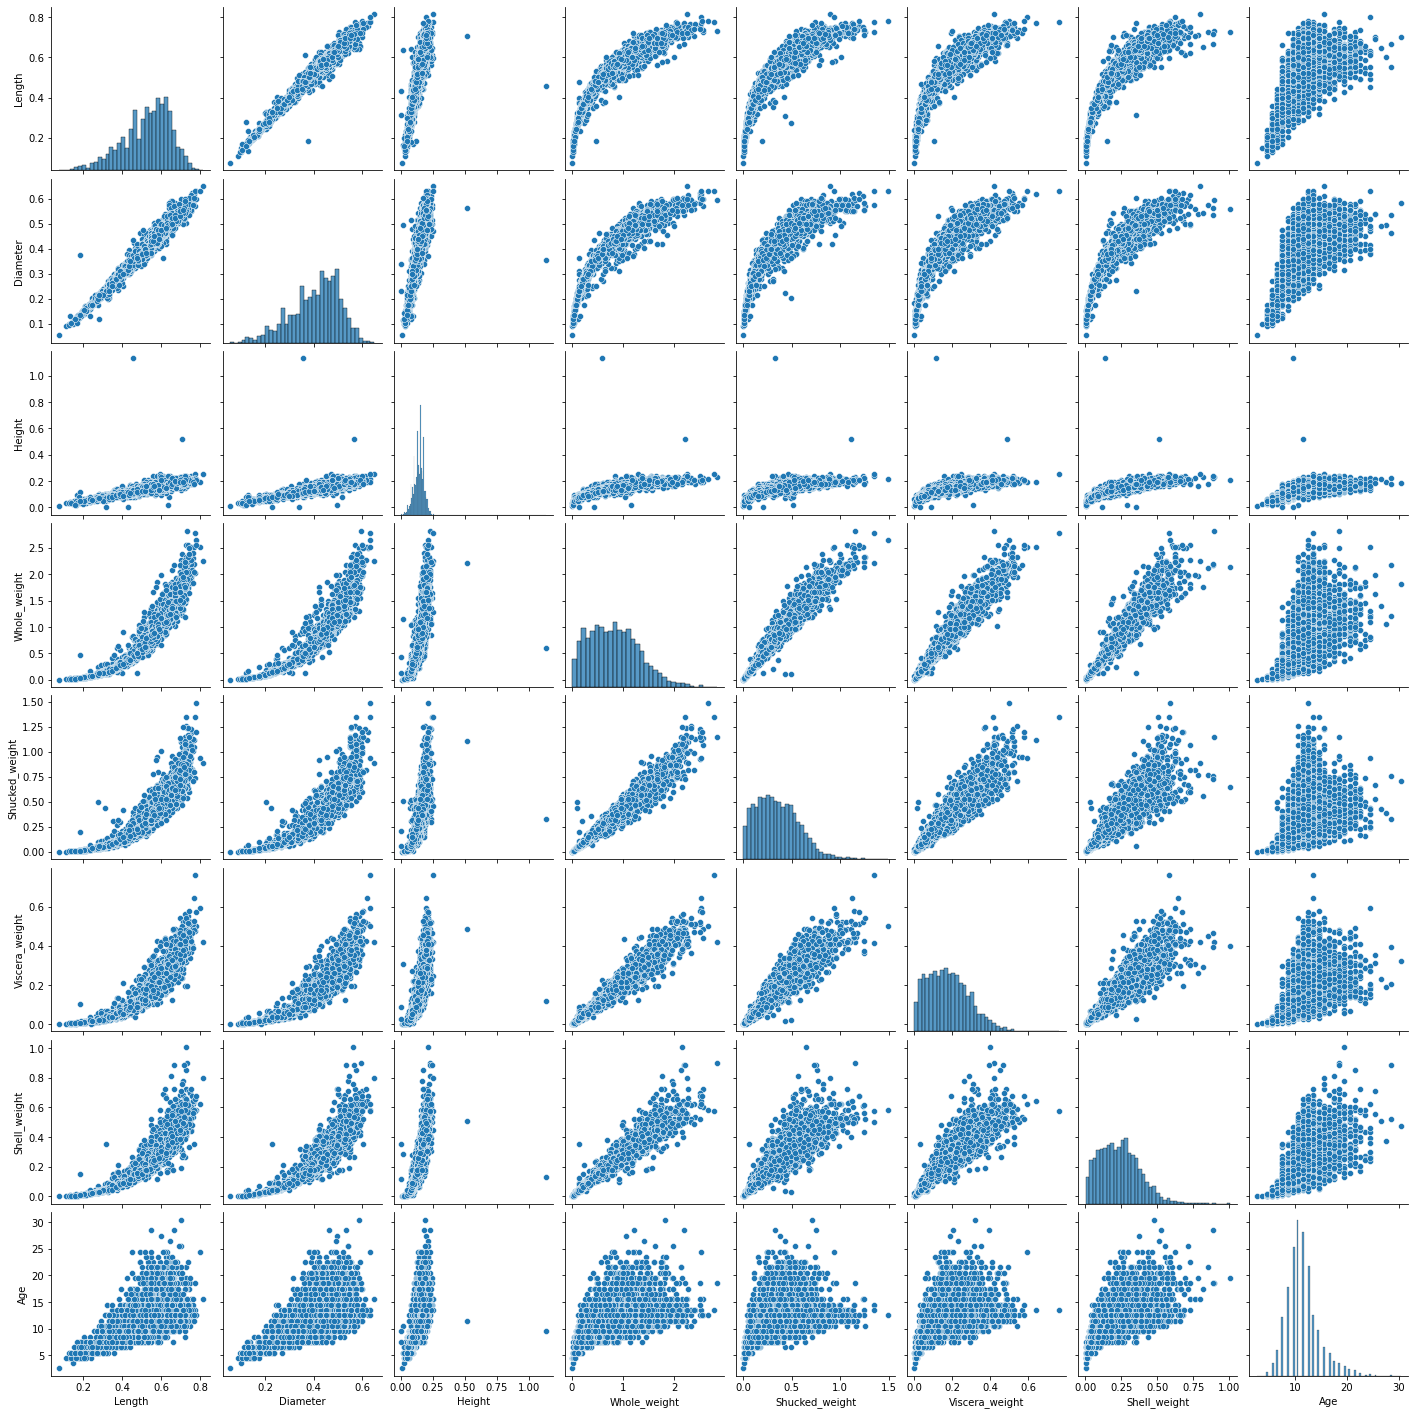

In [62]:
sns.pairplot(df1)

In [63]:
# Multivariate Analysis

D:\PYTHON\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Diameter'>

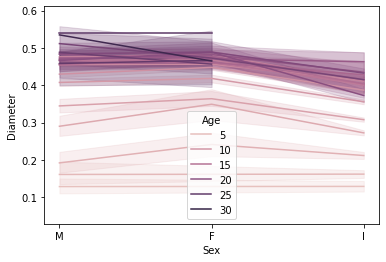

In [64]:
sns.lineplot(df1.Sex,df1.Diameter,df1.Age)

In [65]:
# Skewness
df.skew().sort_values(ascending = False)

C:\Users\DELL\AppData\Local\Temp\ipykernel_37528\2643532045.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew().sort_values(ascending = False)


Height                   3.128817
Class_number_of_rings    1.114102
Age                      1.114102
Shucked_weight           0.719098
Shell_weight             0.620927
Viscera_weight           0.591852
Whole_weight             0.530959
Diameter                -0.609198
Length                  -0.639873
dtype: float64

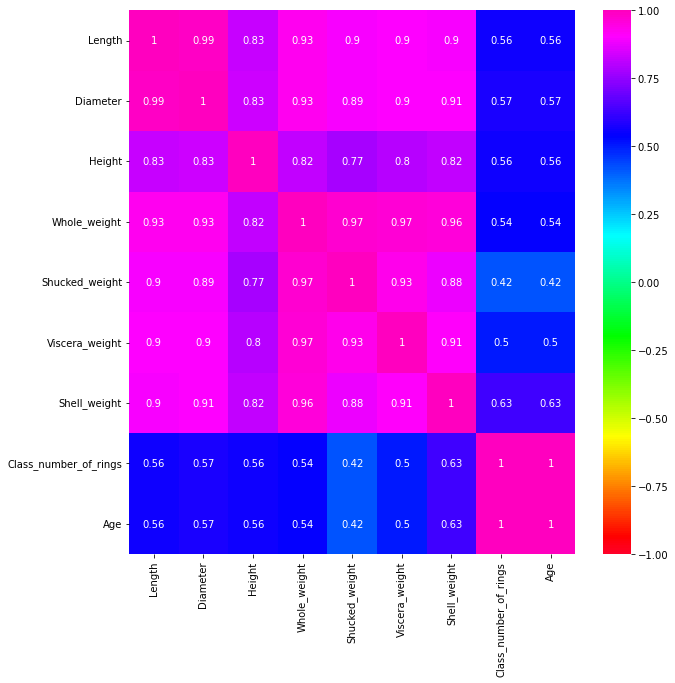

In [66]:
# Correlation Plot
corr = df.corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(corr, vmin = -1, center = 0, annot = True, cmap = 'gist_rainbow')

In [67]:
# Checking for missing values

In [68]:
df.isna().sum()

Sex                      0
Length                   0
Diameter                 0
Height                   0
Whole_weight             0
Shucked_weight           0
Viscera_weight           0
Shell_weight             0
Class_number_of_rings    0
Age                      0
dtype: int64

In [69]:
# Check for Outliers

D:\PYTHON\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length'>

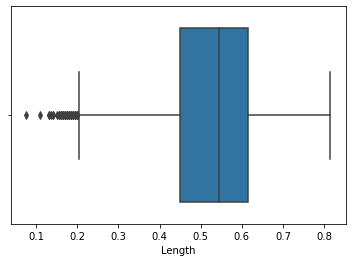

In [70]:
sns.boxplot(df1.Length)

In [71]:
# Replacing the outliers

In [72]:
df1.shape

(4177, 9)

In [73]:
q1=df1.Length.quantile(0.25)
q3=df1.Length.quantile(0.75)

In [74]:
IQR=q3-q1

In [75]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

In [76]:
df=df1[df1.Length>lower_limit]

D:\PYTHON\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length'>

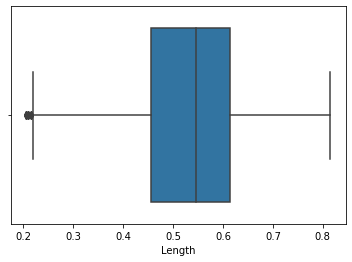

In [77]:
# Box Plot
sns.boxplot(df.Length)

In [78]:
# Performing Encoding

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
encode_le=LabelEncoder()

In [81]:
df.Sex=encode_le.fit_transform(df.Sex)
df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_37528\256943832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex=encode_le.fit_transform(df.Sex)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [82]:
# Splitting the data into dependent and independent variable

In [83]:
y=df['Age'] # Dependent variable
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4128, dtype: float64

In [84]:
# Independent variable
X=df.drop(columns=['Age'],axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [85]:
# Scaling the independent variable

In [86]:
scaler =StandardScaler()
X=scaler.fit_transform(X)

In [87]:
X

array([[ 1.14827225, -0.64005044, -0.48673287, ..., -0.63171904,
        -0.75178281, -0.66456544],
       [ 1.14827225, -1.55823032, -1.54036998, ..., -1.19992558,
        -1.23520441, -1.24536178],
       [-1.27321835,  0.01579234,  0.09276754, ..., -0.48625816,
        -0.37885758, -0.22896819],
       ...,
       [ 1.14827225,  0.62791226,  0.67226795, ...,  0.73652231,
         0.96551485,  0.48250732],
       [-1.27321835,  0.84652652,  0.77763166, ...,  0.7615234 ,
         0.72150205,  0.39538787],
       [ 1.14827225,  1.58981499,  1.51517764, ...,  2.64569629,
         1.78502955,  1.84011875]])

In [88]:
# Split the dataset into Training and Testing data

In [89]:
df.shape

(4128, 9)

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [91]:
x_train.shape

(3302, 8)

In [92]:
x_test.shape

(826, 8)

In [93]:
y_train.shape

(3302,)

In [94]:
y_test.shape

(826,)

In [95]:
# Model Building

In [96]:
# Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
model=LinearRegression()

In [99]:
model.fit(x_train,y_train)

LinearRegression()

In [100]:
y_pred=model.predict(x_test)


In [101]:
y_test

1088     7.5
45       8.5
1594     8.5
1304    10.5
3290    13.5
        ... 
179     12.5
50       9.5
64       9.5
1544     7.5
3474     7.5
Name: Age, Length: 826, dtype: float64

In [102]:
# Evaluating the Model Performance

In [103]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [104]:
model.score(x_test,y_test)

0.4897974474805006

In [105]:
pd.crosstab(y_test,y_pred)

col_0,4.342549,7.018036,7.082073,7.088490,7.119581,7.175478,7.179513,7.268512,7.412460,7.457305,...,17.708163,17.895533,18.096731,18.497506,18.689859,18.725655,18.858813,19.647672,20.207886,20.490157
Age,,,,,,,,,,,,,,,,,,,,,
4.5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.5,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6.5,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [106]:
from sklearn import metrics

In [107]:
metrics.r2_score(y_test,y_pred)

0.4897974474805006

In [108]:
metrics.mean_absolute_error(y_test,y_pred)

1.6282768496737656

In [109]:
metrics.mean_squared_error(y_test,y_pred)

5.0050342758040784

In [110]:
model.intercept_

11.485085151633704

In [111]:
# Random Forest

In [112]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
reg=RandomForestRegressor()

In [114]:
reg.fit(x_train,y_train)

RandomForestRegressor()

In [115]:
y_pred=reg.predict(x_test)

In [116]:
y_test

1088     7.5
45       8.5
1594     8.5
1304    10.5
3290    13.5
        ... 
179     12.5
50       9.5
64       9.5
1544     7.5
3474     7.5
Name: Age, Length: 826, dtype: float64

In [117]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [118]:
reg.score(x_test,y_test)

0.4872467189805795

In [119]:
pd.crosstab(y_test,y_pred)

col_0,5.66,5.74,5.83,5.86,5.88,5.93,6.05,6.16,6.18,6.37,...,17.89,17.97,18.18,18.35,18.44,18.46,18.60,18.94,19.06,19.13
Age,,,,,,,,,,,,,,,,,,,,,
4.5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.5,0,1,0,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6.5,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
12.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
from sklearn import metrics

In [121]:
metrics.r2_score(y_test,y_pred)

0.4872467189805795

In [122]:
metrics.mean_absolute_error(y_test,y_pred)

1.6141646489104118

In [123]:
metrics.mean_squared_error(y_test,y_pred)

5.030056658595641

In [124]:
model.intercept_

11.485085151633704